In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import cv2

In [4]:
def GetTestPicture(numbero_uno):
    global myNormal, myPhoto, myVector, myAlbedo, myMask, myDepth
    myNormal = np.load('BigDataCubes\CombinedDatasets\Part0Normals.npy')[numbero_uno]
    myPhoto = np.load('BigDataCubes\CombinedDatasets\Part0Photos.npy')[numbero_uno]
    myVector = np.load('BigDataCubes\CombinedDatasets\Part0Vectors.npy')[numbero_uno]
    myAlbedo = np.load('BigDataCubes\CombinedDatasets\Part0Albedos.npy')[numbero_uno]
    myMask = np.load('BigDataCubes\CombinedDatasets\Part0Masks.npy')[numbero_uno]
    myDepth = np.load('BigDataCubes\CombinedDatasets\Part0Depth.npy')[numbero_uno]

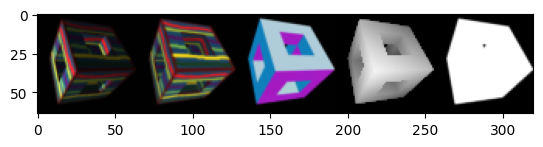

In [5]:
numbero_uno = 2 # 21 - pringle | 9 - donut
blurNormal = np.load('Sharpening/SharpenInputs/small_blurry_predictions.npy')[numbero_uno]
GetTestPicture(numbero_uno)
plt.imshow(np.concatenate([myPhoto, myAlbedo, myNormal, myDepth, myMask], axis = 1).astype("float32"))
#plt.imshow(myPhoto.astype("float32"))

In [6]:
def pixel_rgb_to_hsl(my_pixel):
    minval = np.min(my_pixel)
    brightest_channel = np.argmax(my_pixel)
    maxval = my_pixel[brightest_channel]
    delta = maxval - minval
    luminance = (minval + maxval) / 2
    
    bottom_saturation = (maxval + minval) if luminance <= 0.5 else (2.0 - delta)
    
    if delta == 0:
        return 0, 0, luminance 
        
    saturation = (delta) / bottom_saturation
    hue = 0
    if brightest_channel == 0:
        hue = (my_pixel[1] - my_pixel[2]) / delta
    elif brightest_channel == 1:
        hue = 2.0 + (my_pixel[2] - my_pixel[0]) / delta
    else: 
        hue =  4.0 + (my_pixel[0] - my_pixel[1]) / delta
    hue = hue * 60 + 360 if hue < 0 else hue * 60
    return hue, saturation, luminance 

In [7]:
# Hue Saturation Luminance
def pixel_hsl_to_rgb(my_pixel):
    hue        = my_pixel[0]
    saturation = my_pixel[1]
    luminance  = my_pixel[2]

    H = hue / 60
    C = (1 - abs(luminance * 2 - 1)) * saturation
    X = C * (1 -   abs(H % 2 - 1)    )
    m = luminance - C / 2

    rgb = None
    if hue >= 0   and hue < 60 : rgb = (C, X, 0)
    if hue >= 60  and hue < 120: rgb = (X, C, 0)
    if hue >= 120 and hue < 180: rgb = (0, C, X)
    if hue >= 180 and hue < 240: rgb = (0, X, C)
    if hue >= 240 and hue < 300: rgb = (X, 0, C)
    if hue >= 300 and hue < 360: rgb = (C, 0, X)

    return rgb[0] + m, rgb[1] + m, rgb[2] + m

In [8]:
input = np.array((180, 19, 100))
input = input / 255
result = pixel_rgb_to_hsl(input)
print(result)
result = np.round(np.array(pixel_hsl_to_rgb(result)) * 255)
print(result)

(329.81366459627327, 0.8090452261306533, 0.39019607843137255)
[180.  19. 100.]


In [9]:
vector_rgb2hsl = np.vectorize(pixel_rgb_to_hsl)

In [12]:
def image_coverter(myPicture, funcfunc):
    bigx, bigy, z = myPicture.shape
    if z != 3: return False
    to_return = np.zeros((bigx,bigy,z))
    for x in range(bigx):
        for y in range (bigy):
            to_return[x, y] = funcfunc(myPicture[x,y])
    return to_return

In [14]:
hsl_mypic = image_coverter(myPhoto, pixel_rgb_to_hsl)
rgb_mypic = image_coverter(hsl_mypic, pixel_hsl_to_rgb)

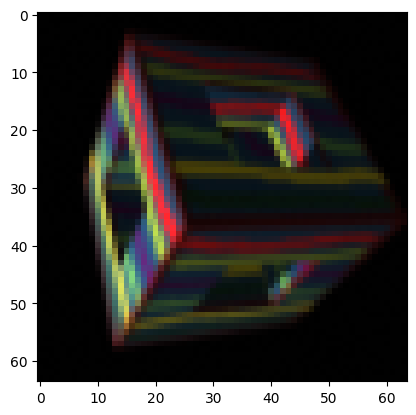

In [15]:
plt.imshow(myPhoto.astype("float32"))

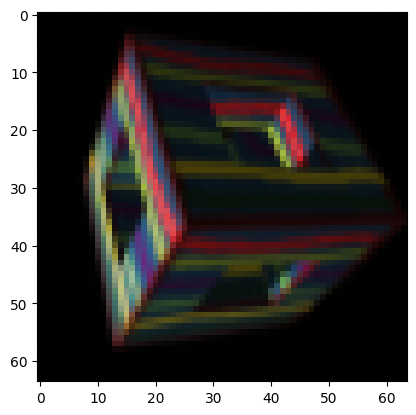

In [16]:
plt.imshow(rgb_mypic.astype("float32"))